<a href="https://colab.research.google.com/github/TriaPutra/Tugas_Python/blob/main/Tugas_11_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
cd /content/drive/MyDrive 

/content/drive/MyDrive


In [57]:
ls

 1101208130_TRIANUSAPUTRA_1.pdf   best_weight_scene_mobileNet.h5
 1101208130_TRIANUSAPUTRA_2.pdf  'Colab Notebooks'/
 1101208130_TRIANUSAPUTRA_3.pdf   DatasetGMB/
 1101208130_TRIANUSAPUTRA_4.pdf  'TRIANUSA PUTRA - 1101208130.pdf'
 1101208130_TRIANUSAPUTRA_5.pdf   tugas_1_probstat_trianusa_putra.pdf
 3scene/


In [58]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [59]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("DatasetGMB")
data = []
labels = []

[INFO] loading images...


In [60]:
# loop over our input images
for imagePath in imagePaths:
    # load the input image from disk, resize it to 64x64 pixels, scale
    # the pixel intensities to the range [0, 1], and then update our
    # images list
    image = Image.open(imagePath)
  #preprocessing
    image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
    data.append(image)
 
    # extract the class label from the file path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [61]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [62]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [63]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [64]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),   np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 64, 64, 3)
(149, 64, 64, 3)


In [119]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
 
model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(24, (4,4), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))
 
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 24)        6168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 24)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 600)             

In [120]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [121]:
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 24)        6168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 24)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 600)             

In [122]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [125]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 0s 9ms/step - loss: 0.2680 - accuracy: 0.9392 - val_loss: 0.5894 - val_accuracy: 0.7987
Epoch 2/30
14/14 [==============================] - 0s 6ms/step - loss: 0.2538 - accuracy: 0.9212 - val_loss: 0.7232 - val_accuracy: 0.7651
Epoch 3/30
14/14 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.9054 - val_loss: 0.6480 - val_accuracy: 0.7987
Epoch 4/30
14/14 [==============================] - 0s 7ms/step - loss: 0.2809 - accuracy: 0.8919 - val_loss: 0.7022 - val_accuracy: 0.7785
Epoch 5/30
14/14 [==============================] - 0s 7ms/step - loss: 0.2448 - accuracy: 0.9167 - val_loss: 0.5893 - val_accuracy: 0.7919
Epoch 6/30
14/14 [==============================] - 0s 6ms/step - loss: 0.2460 - accuracy: 0.9009 - val_loss: 0.8598 - val_accuracy: 0.6577
Epoch 7/30
14/14 [==============================] - 0s 6ms/step - loss: 0.1971 - accuracy: 0.9459 - val_loss: 0.7450 - val_accuracy: 0.7517
Epoch 8/30
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


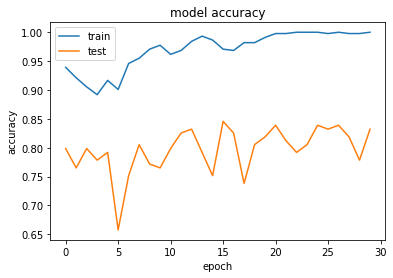

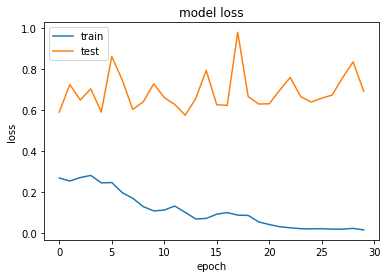

In [126]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.93      0.74      0.82        34
      GMB_03       0.89      0.97      0.93        32
      GMB_04       0.87      0.81      0.84        32
      GMB_10       0.91      0.77      0.83        26
      GMB_11       0.63      0.88      0.73        25

    accuracy                           0.83       149
   macro avg       0.84      0.83      0.83       149
weighted avg       0.85      0.83      0.83       149



In [128]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets
